In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/talkie/train.csv
/kaggle/input/talkie/test.csv


IMPORTING LIBRARIES

In [43]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
import pandas as pd
import numpy as np
import csv
from keras.models import Sequential

IMPORT DATASET

In [44]:
train = pd.read_csv('/kaggle/input/talkie/train.csv')
test = pd.read_csv('/kaggle/input/talkie/test.csv')

SHUFFLING DATASET

In [45]:
train = train.sample(frac = 1)
print(train)
test = test.sample(frac = 1)
print(test)

      Unnamed: 0 char    area   perimeter  roundness     ratio   center_x  \
4368        4368    R  1093.5  162.669047   0.519037  1.812500  30.170248   
5196        5196    U  1128.5  167.497474   0.505213  2.222222  30.071777   
5471        5471    V  1003.5  214.468036   0.274020  2.269231  25.779106   
6324        6324    Z  1063.0  153.053823   0.569947  1.210526  30.396519   
4554        4554    S  1537.0  161.396969   0.741093  1.142857  30.630991   
...          ...  ...     ...         ...        ...       ...        ...   
6242        6242    Y  1354.5  209.923880   0.386051  0.931034  32.773102   
3149        3149    M  1752.5  181.296463   0.669683  1.414634  30.807418   
5096        5096    U  1247.0  181.740114   0.474192  1.735294  27.567495   
926          926    D  1013.5  175.154328   0.414927  1.787879  26.356191   
2033        2033    I  1146.0  169.740114   0.499580  1.838710  30.333042   

       center_y  
4368  41.966469  
5196  37.413528  
5471  37.318053  
632

CONVERTING LABELS IN RANGE OF 1 TO 25

In [46]:
alpha_dict = {}
for i in range(26):
  alpha_dict[chr(65+i)]=i
train['char'] = train.char.apply(lambda x: alpha_dict[x])

In [47]:
y = train['char'].to_numpy()

In [48]:
y_train=[]
for i in y:
  temp=[]
  for j in range(26):
    if(i==j):
      temp.append(1)
    else:
      temp.append(0)
  y_train.append(temp)

In [49]:
x_train = np.column_stack((train.area.values,train.perimeter.values,train.roundness.values,train.ratio.values,train.center_x.values,train.center_y.values))

In [50]:
x_train=x_train.tolist()

BULDIND ML STRUCTURE OF FULLY CONNECTED NETWORK

In [51]:
model= Sequential()

model.add(Dense(128, input_shape=(6,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(26))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               896       
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                      

In [52]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [53]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [54]:
test['char'] = test.char.apply(lambda x: alpha_dict[x])

In [55]:
y = test['char'].to_numpy()
y_test=[]
for i in y:
  temp=[]
  for j in range(26):
    if(i==j):
      temp.append(1)
    else:
      temp.append(0)
  y_test.append(temp)

In [56]:
x_test = np.column_stack((test.area.values,test.perimeter.values,test.roundness.values,test.ratio.values,test.center_x.values,test.center_y.values))

In [57]:
x_test=x_test.tolist()

TRAINING MODEL

In [58]:
history = model.fit(x_train,y_train, batch_size=32, epochs=128,validation_data=(x_test, y_test))

Epoch 1/128
204/204 [==============================] - 3s 7ms/step - loss: 3.4598 - accuracy: 0.0551 - val_loss: 3.0949 - val_accuracy: 0.1042
Epoch 2/128
204/204 [==============================] - 1s 5ms/step - loss: 3.1800 - accuracy: 0.0908 - val_loss: 2.8969 - val_accuracy: 0.2091
Epoch 3/128
204/204 [==============================] - 1s 5ms/step - loss: 3.0030 - accuracy: 0.1183 - val_loss: 2.8359 - val_accuracy: 0.1552
Epoch 4/128
204/204 [==============================] - 1s 5ms/step - loss: 2.8403 - accuracy: 0.1602 - val_loss: 2.7249 - val_accuracy: 0.2014
Epoch 5/128
204/204 [==============================] - 1s 6ms/step - loss: 2.7053 - accuracy: 0.1851 - val_loss: 2.5818 - val_accuracy: 0.1923
Epoch 6/128
204/204 [==============================] - 1s 5ms/step - loss: 2.5761 - accuracy: 0.2025 - val_loss: 2.4452 - val_accuracy: 0.2147
Epoch 7/128
204/204 [==============================] - 1s 5ms/step - loss: 2.4359 - accuracy: 0.2235 - val_loss: 2.2826 - val_accuracy: 0.1895

In [59]:
from matplotlib import pyplot as plt

PLOTTING GRAPH OF ACCURACY

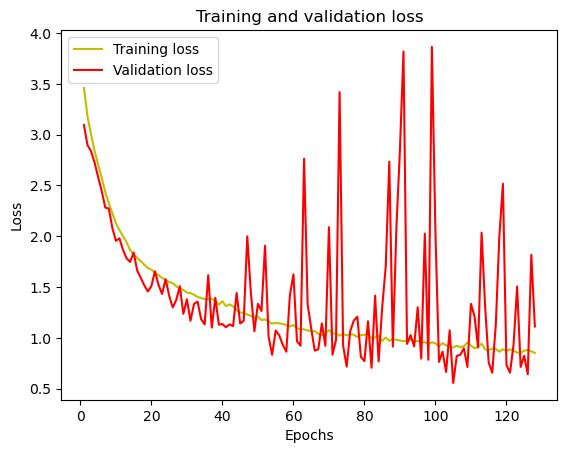

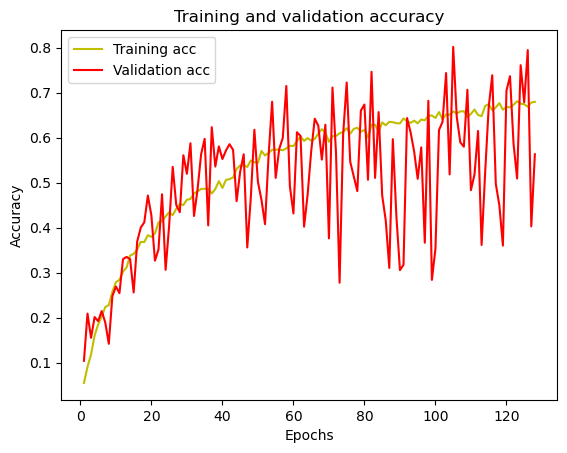

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

EVALUATING MODEL

SAVING MODEL

In [63]:
model.save('aslcsv.h5')

In [61]:
result=np.round(model.predict(np.array([[1435,187.053822755813, 0.515119943159264, 1.59459459459459, 27.1180023228803, 38.0278745644599]])))

1/1 [==============================] - 0s 128ms/step


In [62]:
print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
